# Examples

## Basic Examples

In [1]:
from sympy import *
hyper([1, 1], [3, 3, 3], 2.).evalf()

1.07893440206719

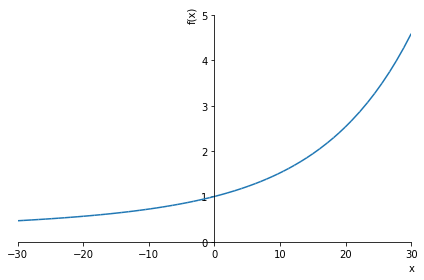

In [12]:
from sympy import *
from sympy.plotting import *
x = symbols("x")
plot(hyper([1, 1], [3, 3, 3], x), (x, -30, 30),
     axis_center=(0, 0), ylim=(0, 5))

In [5]:
from sympy import *
from sympy.abc import z
hyperexpand(hyper([1, 1], [3, 3, 3], z), rewrite=[log, polylog])
# 无法化简

hyper((1, 1), (3, 3, 3), z)

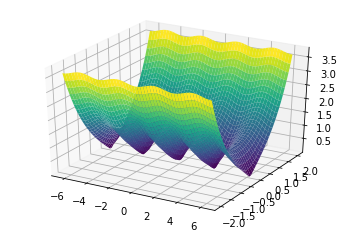

In [15]:
# complexplot3D
from sympy import *
from sympy.functions import *
from sympy.plotting import *
from sympy.abc import x, y
plot3d(
    Abs(sin(x+I*y)),
    (x, -2*pi, 2*pi), (y, -2, 2)
)

In [10]:
from sympy import *
from sympy.abc import x
hyper([1, 1, 2], [3, 3], x).series(x0=oo, n=6)
# 无法 series

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

## Scope

### Numerical Evaluation

In [11]:
from sympy import *
hyper([1, 1, 1], [Rational(3, 2), Rational(3, 2), Rational(3, 2)], 10).evalf(n=50)

530.19188827362590438855961685444087792733053398358

In [13]:
from sympy import *
hyper([1, 1, 1], [Rational(3, 2), Rational(3, 2), Rational(3, 2)],
      10.00000000000000000000000000).evalf()  # 和 Mathematica 一致

530.191888273626

In [1]:
from sympy import *
Array(hyper([1, 2, 3, 4], [5, 6, 7], x).evalf() for x in [0.1, 0.3, 0.5])

[1.01163765887280, 1.03626644615971, 1.06295954475265]

#### 没有测时间函数

In [5]:
from sympy import *
sin(AccumBounds(-pi, pi))

AccumBounds(-1, 1)

In [4]:
from sympy import *
Array(map(sin, [1.2, 1.5, 1.8]))

[0.932039085967226, 0.997494986604054, 0.973847630878195]

In [6]:
from sympy import *
Matrix([[pi, pi/2], [pi/3, pi/4]]).applyfunc(sin)

Matrix([
[        0,         1],
[sqrt(3)/2, sqrt(2)/2]])

### Specific Values

In [19]:
from sympy import *
hyper([1, 1, 3], [2, 2], x).simplify()

-1/(2*x - 2) - log(1 - x)/(2*x)

In [22]:
from sympy import *
a, b, c, x = symbols("a b c x")
hyper([-3, a], [b, c], x).simplify()

(-a*x**3*(a + 1)*(a + 2) + 3*a*x**2*(a + 1)*(b + 2)*(c + 2) - 3*a*x*(b + 1)*(b + 2)*(c + 1)*(c + 2) + b*c*(b + 1)*(b + 2)*(c + 1)*(c + 2))/(b*c*(b + 1)*(b + 2)*(c + 1)*(c + 2))

In [25]:
from sympy import *
a1, a2, a3, b1, b2, b3 = symbols("a1,a2,a3,b1,b2,b3")
hyper([a1, a2, a3], [b1, b2, b3], 0).simplify()

1

In [32]:
from sympy import *
f = symbols("f", cls=Function)
x = symbols("x", real=True)
f = hyper([1, 1, 2], [3, 3], x)-Rational(1, 2)
solveset(Eq(f, 0), domain=Interval.open(-8, -6))

ConditionSet(x, Eq(hyper((1, 1, 2), (3, 3), x) - 1/2, 0), Interval.open(-8, -6))

In [34]:
from sympy import *
f = symbols("f", cls=Function)
x = symbols("x", real=True)
f = hyper([1, 1, 2], [3, 3], x)-Rational(1, 2)
plot(f, (x, -10, 3))

KeyboardInterrupt: 

### Visualization

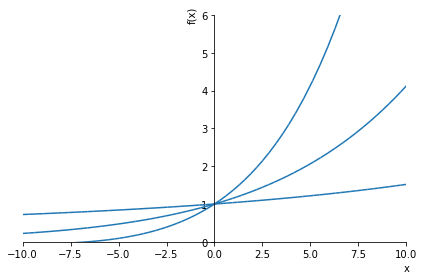

In [36]:
from sympy import *
from sympy.plotting import *
plot(hyper([1, 1], [3, 3, 3], x), hyper([2, 2], [3, 3, 3], x),
     hyper([3, 3], [3, 3, 3], x), ylim=(0, 6))

#### sympy 没有等高线绘图函数，等大神补充

#### sympy 没有极坐标绘图函数，等大神补充

## Function Properties

In [9]:
from sympy import *
from sympy.abc import *
# 好像没定义域函数

Reals

In [12]:
from sympy import *

AccumBounds(-1, 1)

In [40]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
Eq(hyper([a1, a2], [b1, b2, b3], x), hyper(
    [a2, a1], [b1, b2, b3], x)).simplify()

True

In [41]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
Eq(hyper([a1, a2], [b1, b2, b3], x), hyper(
    [a1, a2], [b1, b3, b2], x)).simplify()

True

### Differentiation

In [8]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
diff(hyper([a1, a2], [b1, b2, b3], x), x)

a1*a2*hyper((a1 + 1, a2 + 1), (b1 + 1, b2 + 1, b3 + 1), x)/(b1*b2*b3)

In [7]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
Array(diff(hyper([a1, a2], [b1, b2, b3], x), x, i) for i in range(1, 4))

[a1*a2*hyper((a1 + 1, a2 + 1), (b1 + 1, b2 + 1, b3 + 1), x)/(b1*b2*b3), a1*a2*(a1 + 1)*(a2 + 1)*hyper((a1 + 2, a2 + 2), (b1 + 2, b2 + 2, b3 + 2), x)/(b1*b2*b3*(b1 + 1)*(b2 + 1)*(b3 + 1)), a1*a2*(a1 + 1)*(a1 + 2)*(a2 + 1)*(a2 + 2)*hyper((a1 + 3, a2 + 3), (b1 + 3, b2 + 3, b3 + 3), x)/(b1*b2*b3*(b1 + 1)*(b1 + 2)*(b2 + 1)*(b2 + 2)*(b3 + 1)*(b3 + 2))]

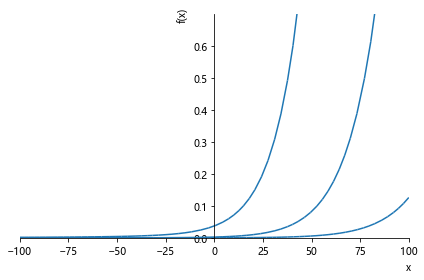

In [13]:
from sympy import *
from sympy.abc import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
plot(*Array(diff(hyper([a1, a2], [b1, b2, b3], x), x, i) for i in range(1, 4)
            ).subs({a1: 1, a2: 1, b1: 3, b2: 3, b3: 3}), (x, -100, 100), ylim=(0, 0.7))

In [25]:
from sympy import *
from sympy.abc import *
n = symbols("n", integer=True, positive=True)
diff(sin(x), x, n)

0

### Integration

In [47]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
integrate(hyper([a1, a2], [b1, b2, b3], x), x)
# failed

Integral(hyper((a1, a2), (b1, b2, b3), x), x)

In [48]:
from sympy import *
a1, a2, x, b1, b2, b3 = symbols("a1,a2,x,b1,b2,b3")
integrate(hyper([a1, a2], [b1, b2, b3], x), (x, 0, 1))

Integral(hyper((a1, a2), (b1, b2, b3), x), (x, 0, 1))

In [50]:
from sympy import *
a1, a2, α, x, b1, b2, b3 = symbols("a1,a2,α,x,b1,b2,b3")
integrate(x**(α-1)*hyper([a1, a2], [b1, b2, b3], x), x)
# failed

Integral(x**(α - 1)*hyper((a1, a2), (b1, b2, b3), x), x)

### Series Expansions

In [52]:
from sympy import *
a1, a2, α, x, b1, b2, b3 = symbols("a1,a2,α,x,b1,b2,b3")
hyper([a1, a2], [b1, b2, b3], x).series(x0=0, n=3)
# 解不出

ValueError: x must be given for multivariate functions.

#### 画不来批量的图

In [ ]:
# 不会级数系数列表

In [38]:
from sympy import *
from sympy.abc import z
fourier_series(sin(z), z, 1)
# 和 MMA 不一样

ValueError: Invalid limits given: z

In [53]:
from sympy import *
# 不能处理 hyper 的级数

### Function Representations

In [56]:
from sympy import *
a1, a2, k, x, b1, b2, b3 = symbols("a1,a2,k,x,b1,b2,b3")
Sum(rf(a1, k)*rf(a2, k)*z**k/(rf(b1, k)*rf(b2, k) *
                              rf(b3, k)*factorial(k)), (k, 0, oo)).simplify()
# 化简结果应该是 hyper([a1,a2],[b1,b2,b3],x)

Sum(z**k*RisingFactorial(a1, k)*RisingFactorial(a2, k)/(RisingFactorial(b1, k)*RisingFactorial(b2, k)*RisingFactorial(b3, k)*factorial(k)), (k, 0, oo))

In [57]:
from sympy import *
# 没有 DifferentialRootReduce，MeijerGReduce

## Applications

In [66]:
from sympy import *
f = symbols("f", cls=Function)
z = symbols("z")
dsolve(
    Eq(diff(f, z, z, z), z**3*f), z
)
# 搞不懂

TypeError: as_base_exp() missing 1 required positional argument: 'self'

In [16]:
def x(m, n, t):
    return summation(
        -(1/(factorial(k) * n)) *
        rf(1 + (k - 1)/n, k - 1) *
        E**(((k - 1) * 2 * pi * I * m)/n) *
        t**k *
        hyper(
            Array((k - 1)/n + jj/(n + 1) for jj in range(1, n+1)),
            Array(jj/n for jj in range(k + 1, k + n+1).pop(n - k-1)),
            (n + 1)*(((n + 1) * t)/n)**n
        ),
        (k, 0, n - 1)
    )


x(1, 4, 1)
# 放弃这个例子

TypeError: can't convert symbols to int

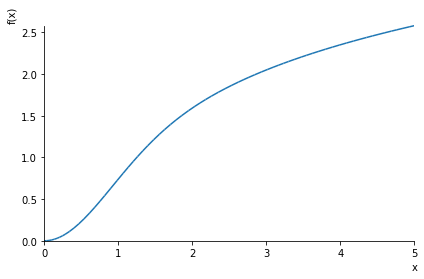

In [104]:
from sympy import *
from sympy.plotting import *
x = symbols("x")


def v(x):
    return x**2*hyper([1, 1], [2, Rational(3, 2)], -x**2)


plot(v(x), (x, 0, 5))

#### Expansion at infinity reveals logarithmic growth:

#### Surface tension of an electrolyte solution as a function of concentration y:

In [73]:
from sympy import *
y = symbols('y')
2*besselk(0, 2*sqrt(y))*hyper([1], [Rational(2, 3), Rational(5, 3)], y)+3*sqrt(
    y)*besselk(1, 2*sqrt(y))*hyper([1], [Rational(5, 3), Rational(5, 3)], y)

3*sqrt(y)*besselk(1, 2*sqrt(y))*hyper((1,), (5/3, 5/3), y) + 2*besselk(0, 2*sqrt(y))*hyper((1,), (2/3, 5/3), y)

#### 级数展开不算了

In [75]:
from sympy import *
from sympy.plotting import *
z, t, m = symbols("z t m")
integrate((z-t)**(-m-1)*sin(t)/gamma(-m), (t, 0, z))
# sympy failed

KeyboardInterrupt: 

In [76]:
from sympy import *
from sympy.plotting import *
z, t, m = symbols("z t m")
plot(integrate((z-t)**(-m-1)*sin(t)/gamma(-m), (t, 0, z)), (z, 0, 2*pi), (m, -1, 1
# 不指望能算))

KeyboardInterrupt: 

## Properties & Relations

In [77]:
from sympy import *
x = symbols("x")
integrate(exp(-x**2)*log(x), x)

-x*hyper((1/2, 1/2), (3/2, 3/2), -x**2) + sqrt(pi)*log(x)*erf(x)/2

In [81]:
from sympy import *
Sum(factorial(2*k)/factorial(4*k+3), (k, 0, oo))
# 化简不了

Sum(factorial(2*k)/factorial(4*k + 3), (k, 0, oo))

In [82]:
from sympy import *
x = symbols("x")
expand_func(hyper([Rational(3, 2)], [1, 1], x))

2*sqrt(x)*besseli(0, sqrt(x))*besseli(1, sqrt(x)) + besseli(0, sqrt(x))**2

## Possible Issues

In [86]:
from sympy import *
hyper([10, 10], [50], 2.).evalf()

-1705.75733163554 - 356.749986056024*I

In [88]:
from sympy import *
a, b, c, d, e, z = symbols("a,b,c,d,e,z")
hyper([a, b, c], [a, d, e], z).simplify()

hyper((b, c), (d, e), z)

In [89]:
from sympy import *
a, b, c, d, e, z = symbols("a,b,c,d,e,z")
hyper([-2, a, b, c], [-2, d, e], z).simplify()

(a*b*c*z**2*(a + 1)*(b + 1)*(c + 1)/2 + a*b*c*z*(d + 1)*(e + 1) + d*e*(d + 1)*(e + 1))/(d*e*(d + 1)*(e + 1))

## Neat Example

In [91]:
from sympy import *
from sympy.plotting import *
hyper(Array(range(2)), range(3), x)

hyper((0, 1), (0, 1, 2), x)

In [17]:
from sympy import *
import numpy as np
n, ε, λ, ω = symbols("n,ε,λ,ω")


def period(n, ε, λ, ω):
    return 2*pi/ω*hyper(
        np.arange(Rational(1, 2), n+Rational(1, 2))/n,
        np.arange(1, n)/(n-1),
        -(2*n/ω**2)**n*(λ*ε**(n-1))/(n-1)**(n-1)
    )


period(2, ε, λ, ω).simplify()

2*pi*hyper((1/4, 3/4), (1.0,), 16*ε*λ*exp_polar(I*pi)/ω**4)/ω

In [18]:
from sympy import *
import numpy as np
n, ε, λ, ω = symbols("n,ε,λ,ω")


def period(n, ε, λ, ω):
    return 2*pi/ω*hyper(
        np.arange(Rational(1, 2), n+Rational(1, 2))/n,
        np.arange(1, n)/(n-1),
        -(2*n/ω**2)**n*(λ*ε**(n-1))/(n-1)**(n-1)
    )


limit(period(2, ε, λ, ω), ω, 0, "+").simplify()
# 搞不懂

oo*sign(hyper((1/4, 3/4), (1.0,), ε*λ*polar_lift(zoo)))

## Hypergeometric1F1

In [4]:
hyper([1], [2], 3.0).evalf()

6.36184564106256

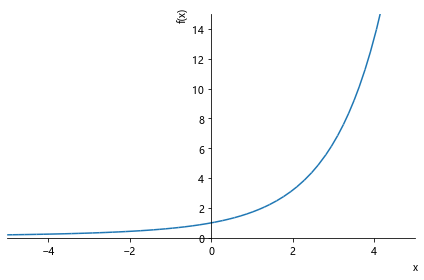

In [8]:
x=symbols("x")
plot(hyper([1], [2], x), (x, -5, 5),ylim=(0,15))

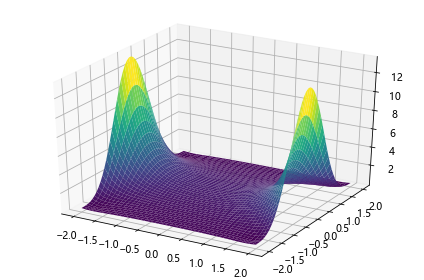

In [21]:
from sympy.plotting import *
y=symbols("y")
plot3d(
   Abs( hyper([1], [2], (x+y*I)**2)),(x,-2,2),(y,-2,2)
      )

In [14]:
a,b=symbols("a b")
hyper([a], [b], x).series(x, 0, 4).simplify()

(a*x**3*(b + 1)*(a**2 + 3*a + 2)/6 + a*x**2*(a + 1)*(b**2 + 3*b + 2)/2 + a*x*(b + 1)*(b**2 + 3*b + 2) + b*(1 + O(x**4))*(b + 1)*(b**2 + 3*b + 2))/(b*(b + 1)*(b**2 + 3*b + 2))

In [25]:
hyper([a], [b], x).series(x, x0=oo,n=2)

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

In [28]:
N(hyper([10],[Rational(1,3)], -1), 50)

1.0856469662771144181060999200053894821341819655655

In [30]:
hyper([10], [Rational(1,3)], -1.000000000000000000000000000000000000).evalf(n=50)

1.0856469662771144181060999200053894821341819655655

In [32]:
hyper([2 + I], [2], 0.5).evalf()

1.6183312284015 + 0.37925777150047*I

In [35]:
Array(hyper([1], [j], 5.0).evalf() for j in (2, 3, 4))

[29.4826318205153, 11.3930527282061, 6.23583163692368]

In [38]:
hyper([Rational(1,2)], [1], x).simplify()

exp(x/2)*besseli(0, x/2)

In [40]:
hyper([2], [1], x).simplify()

(x + 1)*exp(x)

In [41]:
hyper([1],[Rational(1,2)],  x).simplify()

-sqrt(x)*(-sqrt(pi)*erf(sqrt(x)) - exp(-x)/sqrt(x))*exp(x)

In [45]:
limit(hyper([Rational(1,2)], [sqrt(2)], x),x,oo)

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

In [46]:
solveset(
    hyper(
        [Rational(1,2)], 
        [sqrt(2)],
        x
    ) - 2 ,x,domain=Interval.open(0,3.1)
                )

ConditionSet(x, Eq(hyper((1/2,), (sqrt(2),), x) - 2, 0), Interval.open(0, 3.10000000000000))

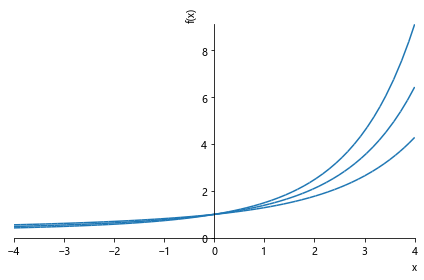

In [47]:
plot(
    hyper([1/2], [sqrt(2)], x), 
  hyper([1/2], [sqrt(3)], x), 
  hyper([1/2], [sqrt(5)], x), (x, -4, 4))

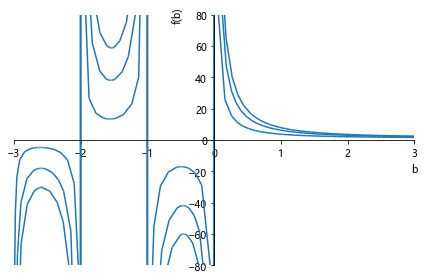

In [49]:
plot(hyper([sqrt(2)], [b], 1),
     hyper([sqrt(5)], [b], 1),
     hyper([sqrt(7)], [b], 1), (b, -3, 3),
     ylim=(-80, 80)
     )

In [51]:
diff(hyper([a], [b], x), x)

a*hyper((a + 1,), (b + 1,), x)/b

In [55]:
Array(diff(hyper([a], [b], x), (x, n)).simplify() for n in ( 1,2, 3))

[a*hyper((a + 1,), (b + 1,), x)/b, a*(a + 1)*hyper((a + 2,), (b + 2,), x)/(b*(b + 1)), a*(a + 1)*(a + 2)*hyper((a + 3,), (b + 3,), x)/(b*(b + 1)*(b + 2))]

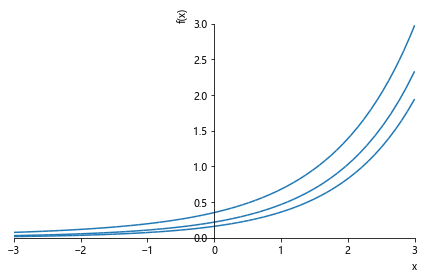

In [57]:
plot(
    *Array(
        diff(
            hyper([a], [b], x),
            (x, n)
        ).subs(
            {
                a: 1/2,
                b: sqrt(2)
            }
        ) for n in (1, 2, 3)
    ),
    (x, -3, 3)
)

In [59]:
n=symbols("n")
diff(hyper([a],[ b], x), (x, n))

Derivative(hyper((a,), (b,), x), (x, n))

In [61]:
integrate(hyper([a], [b], x), x).simplify()

Integral(hyper((a,), (b,), x), x)

In [63]:
integrate(hyper([1], [sqrt(2)], x), (x, 0, 1)).simplify()

Integral(x**(1 - sqrt(2))*(-1 + sqrt(2))*exp(x)*lowergamma(-1 + sqrt(2), x), (x, 0, 1))

In [67]:
from sympy.abc import *
integrate(
 t**(alpha - 1)* hyper([a], [b], -t), (t, 0, oo), 
)

Integral(t**(alpha - 1)*hyper((a,), (b,), -t), (t, 0, oo))

In [69]:
integrate(exp(-x)* hyper([a], [b], x), x)

Integral(exp(-x)*hyper((a,), (b,), x), x)

In [71]:
hyper([a], [b], x).series(x, 0, 5).simplify()

(a*x**4*(b + 1)*(b**2 + 3*b + 2)*(a**3 + 6*a**2 + 11*a + 6)/24 + a*x**3*(b + 1)*(a**2 + 3*a + 2)*(b**3 + 6*b**2 + 11*b + 6)/6 + a*x**2*(a + 1)*(b**2 + 3*b + 2)*(b**3 + 6*b**2 + 11*b + 6)/2 + a*x*(b + 1)*(b**2 + 3*b + 2)*(b**3 + 6*b**2 + 11*b + 6) + b*(1 + O(x**5))*(b + 1)*(b**2 + 3*b + 2)*(b**3 + 6*b**2 + 11*b + 6))/(b*(b + 1)*(b**2 + 3*b + 2)*(b**3 + 6*b**2 + 11*b + 6))

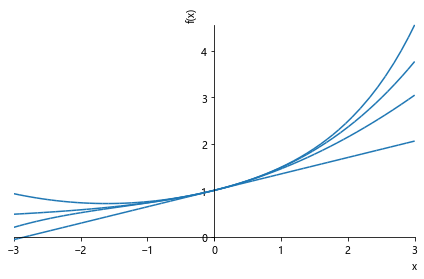

In [82]:
x=symbols("x")
terms = Array(
    hyper(
        [Rational(1, 2)], [sqrt(2)], x
    ).series(x, x0=0, n=m).removeO() for m in (2, 3,4)
)
plot(
    hyper(
        [Rational(1, 2)], [sqrt(2)], x
    ),
    *terms,
    (x, -3, 3)
)

In [85]:
hyper([Rational(1,3)], [Rational(2,3)], z). series(z,oo, 2)

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

In [88]:
hyper([Rational(1,7)], [Rational(3,7)], log(1 + z) + O(z)**5)

TypeError: 'Symbol' object is not callable

In [89]:
laplace_transform(hyper([a], [b], -t), t, s)

LaplaceTransform(hyper((a,), (b,), -t), t, s)

In [92]:
exp(z)* hyper([a], [b], -z).simplify()

exp(z)*hyper((a,), (b,), -z)

In [99]:
hyper(
    [a], [b], z
) + (
    gamma(a - b + 1) * gamma(b - 1)
)/(
    gamma(a) * gamma(1 - b)
) * z**(1 - b) * hyper(
    h[a - b + 1], [2 - b], z
)

TypeError: 'Symbol' object is not callable

In [102]:
summation(
    rf(a, k)*z**k/(rf(b, k)*factorial(k)), 
    (k, 0,oo)
)

hyper((a,), (b,), z)

In [112]:
Matrix(
    [
        [
            (
                hyper([-i], [-i - j], z) /
                hyper([-j], [-i - j], -z)
            ).simplify()
            for i in (1, 2)
        ]
        for j in (1, 2)
    ]
)

Matrix([
[          -(z + 2)/(z - 2),         -(z**2 + 4*z + 6)/(2*z - 6)],
[(2*z + 6)/(z**2 - 4*z + 6), (z**2 + 6*z + 12)/(z**2 - 6*z + 12)]])

In [114]:
integrate(t**a  *exp(-t)/sqrt(1 + t), (t, 0, oo)).simplify()

Piecewise((meijerg(((-a,), ()), ((-a - 1/2, 0), ()), 1)/sqrt(pi), re(a) + 1 > 0), (Integral(t**a*exp(-t)/sqrt(t + 1), (t, 0, oo)), True))

## Hypergeometric2F1

In [116]:
hyper([2., 3.],[ 4.], 5.0).evalf()

0.156542129333755 + 0.15079644737231*I

In [119]:
hyper([2, 3], [4], x).simplify()

(3*x - 6)/(x**3 - x**2) + 6*log(1 - x)/x**3

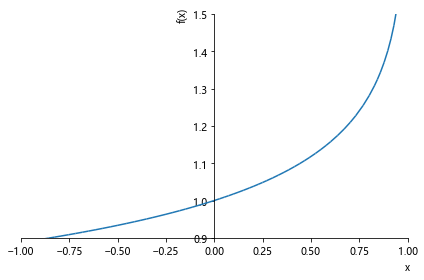

In [129]:
plot(
    hyper(
        [Rational(1, 3), Rational(1, 3)],
        [Rational(2, 3)],
        x
    ),
    (x, -1, 1),
    axis_center=(0, 0.9),
    ylim=(0.9, 1.5)
)

In [135]:
x,y=symbols("x y")
plot3d(
    Abs(
        hyper([2, 3], [4], x+y*I)
    ),
    (x, -2, 2),
    (y, -2, 2)
)

ValueError: The number of free_symbols in the expression is greater than 2

In [139]:
hyper([a, b], [c], x).series( x, 0, 4).simplify()

(a*b*x**3*(c + 1)*(a**2*b**2 + 3*a**2*b + 2*a**2 + 3*a*b**2 + 9*a*b + 6*a + 2*b**2 + 6*b + 4)/6 + a*b*x**2*(c**2 + 3*c + 2)*(a*b + a + b + 1)/2 + a*b*x*(c + 1)*(c**2 + 3*c + 2) + c*(1 + O(x**4))*(c + 1)*(c**2 + 3*c + 2))/(c*(c + 1)*(c**2 + 3*c + 2))

In [140]:
hyper([2, 3], [4], x).series( x,oo, 5)

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

In [152]:
hyper([2, 3], [4], x). series(x, 1, 4).simplify()
#???

nan

In [156]:
hyper([Rational(1,2), Rational(1,3)], [2], 1).evalf(50)

1.1595952669639283657699920515700208819451652634398

In [159]:
hyper([2 + I, -I], [Rational(1,3)], Rational(1,2) - Rational(1,2) *I).evalf()

hyper((I + 2, -I), (1/3,), 1/2 - I/2)

In [163]:
Array(
    hyper(
        [-j, 3], [4], Rational(1, 2)
    ) .simplify()
    for j in range(1, 4)
)

[5/8, 2/5, 21/80]

In [166]:
hyper([Rational(3,2), 2], [3], x).simplify()

sqrt(1 - x)*(4*x - 8)/(x**3 - x**2) - 8/x**2

In [168]:
hyper([Rational(1,2), Rational(1,2)], [1], z).simplify()

2*elliptic_k(z)/pi

In [170]:
hyper([1, Rational(1,2)], [Rational(3,2)], y**2).simplify()

atanh(y)/y

In [172]:
hyper([n, m], [n + m + 2], 1).simplify()

gamma(m + n + 2)/(gamma(m + 2)*gamma(n + 2))

In [174]:
hyper([-3, 3], [2], x).simplify()

-5*x**3/2 + 6*x**2 - 9*x/2 + 1

In [176]:
Eq(
    hyper([a, b], [c], z), hyper([b, a], [c], z)
).simplify()

True

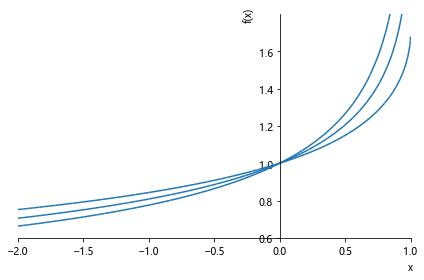

In [182]:
plot(
    hyper([1, 1/2], [sqrt(2)], x),
    hyper([1, 1/2], [sqrt(3)], x),
    hyper([1, 1/2], [sqrt(5)], x),
    (x, -2, 1),
    ylim=(0.6, 1.8),
    axis_center=(0, 0.6)
)

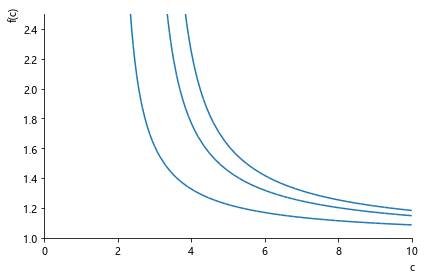

In [186]:
plot(
    hyper([Rational(1,2), sqrt(2)], [c], 1),
    hyper([Rational(1,2), sqrt(5)], [c], 1),
    hyper([Rational(1,2), sqrt(7)], [c], 1),
    (c, 0, 10),
    ylim=(1,2.5),
    axis_center=(0,1)
)

In [187]:
diff(
    hyper([a, b], [c], x),
    x
)

a*b*hyper((a + 1, b + 1), (c + 1,), x)/c

In [196]:
Array(
    diff(
        hyper([a, b], [c], x),
        (x, n)
    ).simplify()
    for n in (1, 2, 3)
)

[a*b*hyper((a + 1, b + 1), (c + 1,), x)/c, a*b*(a + 1)*(b + 1)*hyper((a + 2, b + 2), (c + 2,), x)/(c*(c + 1)), a*b*(a + 1)*(a + 2)*(b + 1)*(b + 2)*hyper((a + 3, b + 3), (c + 3,), x)/(c*(c + 1)*(c + 2))]

In [2]:
from sympy import *
x,a,b,c,n=symbols("x a b c n")
plot(
    *Array(
        diff(
            hyper([a, b], [c], x),
            (x, n)
        ).subs(
            {
                a: Rational(1, 3),
                b: Rational(1, 3),
                b: Rational(2, 3),
            }
        )
        for n in (1, 2, 3)
    ),
    (x, -1, 1)
)
# I don't know

ValueError: The same variable should be used in all univariate expressions being plotted.

In [198]:
diff(hyper([a, b], [c], x), (x, n))

Derivative(hyper((a, b), (c,), x), (x, n))

In [200]:
integrate(hyper([a, b], [c], x), x).simplify()

Integral(hyper((a, b), (c,), x), x)

In [203]:
integrate(hyper([Rational(1,3), Rational(1,3)], [Rational(2,3)], x), (x, 0, 1)).rewrite(gamma)

Integral(hyper((1/3, 1/3), (2/3,), x), (x, 0, 1))

In [206]:
integrate(x**(alpha - 1) *hyper([a, b], [c], alpha *x),   x)

Integral(x**(alpha - 1)*hyper((a, b), (c,), alpha*x), x)

In [209]:
hyper([a, b], [c], x).series(x, 0, 4).simplify()

(a*b*x**3*(c + 1)*(a**2*b**2 + 3*a**2*b + 2*a**2 + 3*a*b**2 + 9*a*b + 6*a + 2*b**2 + 6*b + 4)/6 + a*b*x**2*(c**2 + 3*c + 2)*(a*b + a + b + 1)/2 + a*b*x*(c + 1)*(c**2 + 3*c + 2) + c*(1 + O(x**4))*(c + 1)*(c**2 + 3*c + 2))/(c*(c + 1)*(c**2 + 3*c + 2))

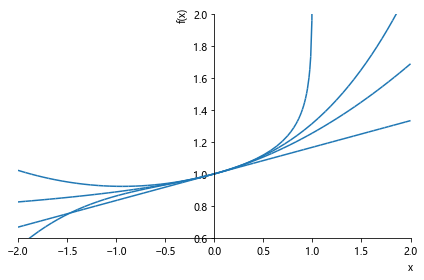

In [16]:
plot(
    hyper(
        [Rational(1, 3), Rational(1, 3)],
        [Rational(2, 3)],
        x
    ),
    *Array(
        hyper(
            [Rational(1, 3), Rational(1, 3)],
            [Rational(2, 3)],
            x
        ).series(x, 0, j).removeO()
        for j in (2, 3, 4)
    ),
    (x, -2, 2),
    axis_center=(0, 0.6),
    ylim=(0.6, 2)
)

In [21]:
z=symbols("z")
hyper([Rational(1, 3), Rational(1, 3)], [Rational(2, 3)], z).series( z, 1, 2)

hyper((1/3, 1/3), (2/3,), 1) + (z - 1)*hyper((4/3, 4/3), (5/3,), 1)/6 + O((z - 1)**2, (z, 1))

In [22]:
hyper([Rational(1, 3), Rational(1, 3)], [Rational(2, 3)], z).series( z, oo, 1)

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

In [26]:
((1 - z)**(a + b - c)* hyper([a, b], [c], z)).simplify()

(1 - z)**(a + b - c)*hyper((a, b), (c,), z)

In [29]:
k=symbols("k")
summation((rf(a, k)*rf(b, k)*z**k)/(rf(c, k)*
    factorial(k)), (k, 0, oo)).simplify()

Piecewise((hyper((a, b), (c,), z), ((Abs(z) <= 1) | (Abs(z) < 1)) & ((Abs(z) <= 1) | (re(a) + re(b) - re(c) >= 1)) & (Ne(z, 1) | (Abs(z) < 1) | (re(a) + re(b) - re(c) < 0)) & (Ne(z, 1) | (re(a) + re(b) - re(c) >= 1) | (re(a) + re(b) - re(c) < 0)) & ((Abs(z) < 1) | (re(a) + re(b) - re(c) < 0) | (re(a) + re(b) - re(c) < 1))), (Sum(z**k*RisingFactorial(a, k)*RisingFactorial(b, k)/(RisingFactorial(c, k)*factorial(k)), (k, 0, oo)), True))

In [32]:
hyper([2, b], [(5 - b)/2], -Rational(1,2)).simplify()

hyper((2, b), (5/2 - b/2,), -1/2)

In [34]:
hyper([a, a + Rational(1,2)], [2 *a], z).simplify()

2**(2*a - 1)*z*(sqrt(1 - z) + 1)**(-2*a)/(z - 1) - 2**(2*a - 1)*(sqrt(1 - z) + 1)**(1 - 2*a)/(z - 1)

In [38]:
Array(
    hyper([1, a],[a], x), 
    hyper([1], [], x)
)

TypeError: 'hyper' object is not iterable

In [40]:
hyper([1, -2], [-2], x).simplify()

x**2 + x + 1

## Hypergeometric2F1Regularized

In [1]:
from sympy.abc import *
from sympy import *
def Hypergeometric2F1Regularized(a,b,c,z):
    return hyper([a,b],[c],z)/gamma(c)

In [4]:
Hypergeometric2F1Regularized(1, 2, -3, Rational(9,2))
hyper([1,2],[-3],Rational(9,2))/gamma(-3)

0

In [3]:
Hypergeometric2F1Regularized(1, 2, -3, x)

0